Task 2: ε-Greedy Policy on a Custom GridWorld

In [19]:
import numpy as np
from typing import Tuple, List
import matplotlib.pyplot as plt

In [20]:
Action : List[str] = ['up', 'down', 'left', 'right']
grid : List[List[int]] = [[0,1,-1,-1], [-1,-1,1,-1], [-100,-1,-1,50], [-100, -1, -100, -1]]

In [21]:
def reset():
    agent_pos : Tuple[int, int] = (0,0)
    return agent_pos

def move(ini_state: Tuple[int, int], action : int) -> Tuple[Tuple[int, int], int, bool] :
    next_state = move_agent(ini_state, Action[action])
    reward = 0
    (x, y) = next_state
    reward += grid[x][y]
    
    done = False
    if grid[x][y] == 50 :
        done = True
    
    return (next_state, reward, done)

def move_agent(ini_state, action) -> Tuple[int, int] :
    (x, y) = ini_state
    if action == 'up' and y+1 <= 3 :
        agent_pos = (x, y+1)
        return agent_pos
    if action == 'down' and y-1 >= 0 :
        agent_pos = (x, y-1)
        return agent_pos
    if action == 'left' and x-1 >= 0 :
        agent_pos = (x-1, y)
        return agent_pos
    if action == 'right' and x+1 <= 3 :
        agent_pos = (x+1, y)
        return agent_pos
    else :
        return ini_state

In [22]:
def select_action(Q, state, epsilon) -> Tuple[int, int] :
    val = np.random.random()
    if val < epsilon :
        action = np.random.randint(1, len(Action))
        return action-1
    elif val >= epsilon :
        index = np.argmax(Q[str(state)])
        return index

In [ ]:
from collections import deque
Q = {}
reward_history_e1 = deque(maxlen = 100)
reward_history_e2 = deque(maxlen = 100)
def Q_learning(epsilon):
    gamma = 0.95
    alpha = 0.1
    n_episodes = 0
    print("IM inside fn")
    while n_episodes <= 500 :
        #print("IM inside loop")
        state = reset()
        done = False
        total_reward = 0
        max_steps = 200
        n_steps = 0
        while not done and n_steps < max_steps :
            state_key = str(state)
            if state_key not in Q:
                Q[state_key] = [0, 0, 0 ,0]
            
            action = select_action(Q, state, epsilon)
            next_state, reward, done = move(state, action)
            #print("CHECKPOINT 1")
            total_reward += reward
            
            if done == True :
                break

            next_key = str(next_state)
            if next_key not in Q:
                Q[next_key] = [0, 0, 0, 0]

            (x, y) = next_state
            temporal_difference = grid[x][y] + gamma*np.max(Q[next_key]) - Q[state_key][action]
            Q[state_key][action] = Q[state_key][action] + alpha * temporal_difference

            state = next_state
            n_steps +=1
        n_episodes +=1
        print(f"Episode {n_episodes} is completed. Reward : {total_reward}")
        if epsilon == 0.1 :
            reward_history_e1.append(total_reward)
        elif epsilon == 0.2 :
            reward_history_e2.append(total_reward)    

IM inside fn
HELLLOOOO
Episode 1 is completed. Reward : 152
HELLLOOOO
Episode 2 is completed. Reward : 178
HELLLOOOO
Episode 3 is completed. Reward : 187
HELLLOOOO
Episode 4 is completed. Reward : 181
HELLLOOOO
Episode 5 is completed. Reward : 178
HELLLOOOO
Episode 6 is completed. Reward : 180
HELLLOOOO
Episode 7 is completed. Reward : 184
HELLLOOOO
Episode 8 is completed. Reward : 178
HELLLOOOO
Episode 9 is completed. Reward : 177
HELLLOOOO
Episode 10 is completed. Reward : 156
HELLLOOOO
Episode 11 is completed. Reward : 179
HELLLOOOO
Episode 12 is completed. Reward : 168
HELLLOOOO
Episode 13 is completed. Reward : 181
HELLLOOOO
Episode 14 is completed. Reward : 186
HELLLOOOO
Episode 15 is completed. Reward : 180
HELLLOOOO
Episode 16 is completed. Reward : 187
HELLLOOOO
Episode 17 is completed. Reward : 180
HELLLOOOO
Episode 18 is completed. Reward : 180
HELLLOOOO
Episode 19 is completed. Reward : 175
HELLLOOOO
Episode 20 is completed. Reward : 177
HELLLOOOO
Episode 21 is completed. R

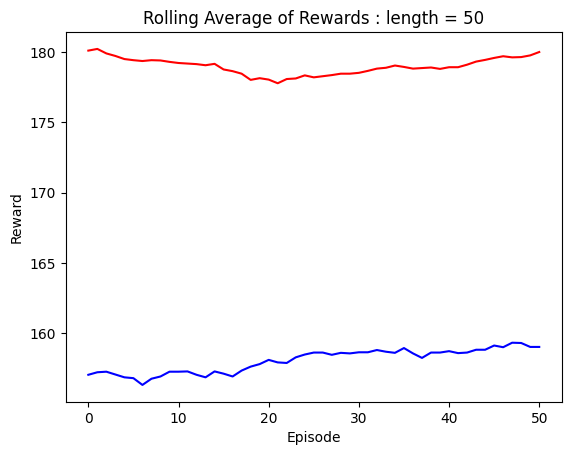

In [24]:
Q_learning(0.1)
Q_learning(0.2)

rolling_length = 50
reward_moving_average_e1 = (
    np.convolve(reward_history_e1, np.ones(rolling_length), mode = "valid")/rolling_length
)
reward_moving_average_e2 = (
    np.convolve(reward_history_e2, np.ones(rolling_length), mode = "valid")/rolling_length
)
plt.title("Rolling Average of Rewards : length = 50")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(range(len(reward_moving_average_e1)), reward_moving_average_e1, color = "red", label = "Epsilon = 0.1")
plt.plot(range(len(reward_moving_average_e2)), reward_moving_average_e2, color = "blue", label = "Epsilon = 0.2")
plt.show()